In [1]:
from pykml import parser

In [2]:
kml_file="splitgrid.kml"
class Polygon:
    def __init(self,ids=None,crop_count=None,canopy_cov=None,stress_ind=None,ndvi=None,canopy_per=None,centre=None,coords=None,types=None,sorted_id=None):
        self.ids=ids
        self.row_id=row_id
        self.crop_count=crop_count
        self.canopy_cov=canopy_cov
        self.stress_ind=stress_ind
        self.ndvi=ndvi
        self.canopy_per=canopy_per
        self.centre=centre
        self.coords=coords
        self.types=types
        self.range_id=range_id

        

In [3]:
f=open(kml_file,"r")
docs=parser.parse(f)
doc=docs.getroot().Document.Folder
print(len(doc.Placemark))
polygons=[Polygon() for i in range(len(doc.Placemark))]
polygons[0]

1052


In [4]:
i=0
for place in doc.Placemark:
    s=str(place.description).split("<BR>")
    print(s)
    ids=s[2]
    crop_count=s[3]
    canopy_cov=s[4]
    stress_ind=s[5]
    ndvi=s[6]
    canopy_per=s[7]
    centre=[]
    print()
    centre.append(float(s[8].split(" ")[-1]))
    centre.append(float(s[9].split(" ")[-1]))
    #print(t.split(" "))
    polygons[i].ids=int(ids.split(" ")[-1])
    polygons[i].crop_count=int(crop_count.split(" ")[-1])
    polygons[i].canopy_cov=(canopy_cov.split(" ")[-1])
    polygons[i].stress_ind=(stress_ind.split(" ")[-1])
    polygons[i].ndvi=(ndvi.split(" ")[-1])
    polygons[i].canopy_per=(canopy_per.split(" ")[-1])
    polygons[i].centre={"type":"Point","coordinates":centre}
    polygons[i].types="automatic"
    i=i+1
    
    

['Unknown Area Type', '', '<B>Grid_Id</B> = 529', '<B>Crop_Count</B> = 82', '<B>Canopy_Cov</B> = NIL', '<B>Stress_Ind</B> = NIL', '<B>NDVI</B> = NIL', '<B>Canopy_Per</B> = NIL', '<B>POINT_X</B> = -8.94508812370e+001', '<B>POINT_Y</B> = 4.29796827350e+001']

['Unknown Area Type', '', '<B>Grid_Id</B> = 528', '<B>Crop_Count</B> = 95', '<B>Canopy_Cov</B> = NIL', '<B>Stress_Ind</B> = NIL', '<B>NDVI</B> = NIL', '<B>Canopy_Per</B> = NIL', '<B>POINT_X</B> = -8.94508998669e+001', '<B>POINT_Y</B> = 4.29796830635e+001']

['Unknown Area Type', '', '<B>Grid_Id</B> = 527', '<B>Crop_Count</B> = 85', '<B>Canopy_Cov</B> = NIL', '<B>Stress_Ind</B> = NIL', '<B>NDVI</B> = NIL', '<B>Canopy_Per</B> = NIL', '<B>POINT_X</B> = -8.94509183749e+001', '<B>POINT_Y</B> = 4.29796837195e+001']

['Unknown Area Type', '', '<B>Grid_Id</B> = 526', '<B>Crop_Count</B> = 83', '<B>Canopy_Cov</B> = NIL', '<B>Stress_Ind</B> = NIL', '<B>NDVI</B> = NIL', '<B>Canopy_Per</B> = NIL', '<B>POINT_X</B> = -8.94509372222e+001', '<B>POIN

In [5]:
for i in polygons:
    print(i.__dict__)
    break

{'ids': 529, 'crop_count': 82, 'canopy_cov': 'NIL', 'stress_ind': 'NIL', 'ndvi': 'NIL', 'canopy_per': 'NIL', 'centre': {'type': 'Point', 'coordinates': [-89.450881237, 42.979682735]}, 'types': 'automatic'}


In [6]:
n=0
for place in doc.Placemark:
    x=str(place.Polygon.outerBoundaryIs.LinearRing.coordinates)
    x=x.strip().split("\n")
    x=[i.strip() for i in x]
    print(x)
    m=1
    coords={}
    for i in x:
        if(m<5):
            i=i.split(",")
            i.pop()
            key1="Log"+str(m)
            key2="Lat"+str(m)
            coords[key1]=i[0]
            coords[key2]=i[1]
            m=m+1
    polygons[n].coords=coords
    n=n+1
        
    

['-89.4508762919,42.9797173727,0', '-89.4508835216,42.9797175222,0', '-89.4508861838,42.9796480935,0', '-89.4508789541,42.9796479440,0', '-89.4508762919,42.9797173727,0']
['-89.4508949218,42.9797177013,0', '-89.4509021515,42.9797178508,0', '-89.4509048138,42.9796484220,0', '-89.4508975841,42.9796482725,0', '-89.4508949218,42.9797177013,0']
['-89.4509134298,42.9797183572,0', '-89.4509206595,42.9797185067,0', '-89.4509233217,42.9796490780,0', '-89.4509160920,42.9796489285,0', '-89.4509134298,42.9797183572,0']
['-89.4509322771,42.9797185086,0', '-89.4509395068,42.9797186581,0', '-89.4509421691,42.9796492294,0', '-89.4509349394,42.9796490799,0', '-89.4509322771,42.9797185086,0']
['-89.4509522682,42.9797195974,0', '-89.4509594979,42.9797197469,0', '-89.4509621301,42.9796511000,0', '-89.4509549004,42.9796509505,0', '-89.4509522682,42.9797195974,0']
['-89.4510292727,42.9797198208,0', '-89.4510365024,42.9797199703,0', '-89.4510391645,42.9796505416,0', '-89.4510319348,42.9796503921,0', '-89.451

In [7]:
data=[polygon.__dict__ for polygon in polygons]

In [8]:
data

[{'ids': 529,
  'crop_count': 82,
  'canopy_cov': 'NIL',
  'stress_ind': 'NIL',
  'ndvi': 'NIL',
  'canopy_per': 'NIL',
  'centre': {'type': 'Point', 'coordinates': [-89.450881237, 42.979682735]},
  'types': 'automatic',
  'coords': {'Log1': '-89.4508762919',
   'Lat1': '42.9797173727',
   'Log2': '-89.4508835216',
   'Lat2': '42.9797175222',
   'Log3': '-89.4508861838',
   'Lat3': '42.9796480935',
   'Log4': '-89.4508789541',
   'Lat4': '42.9796479440'}},
 {'ids': 528,
  'crop_count': 95,
  'canopy_cov': 'NIL',
  'stress_ind': 'NIL',
  'ndvi': 'NIL',
  'canopy_per': 'NIL',
  'centre': {'type': 'Point', 'coordinates': [-89.4508998669, 42.9796830635]},
  'types': 'automatic',
  'coords': {'Log1': '-89.4508949218',
   'Lat1': '42.9797177013',
   'Log2': '-89.4509021515',
   'Lat2': '42.9797178508',
   'Log3': '-89.4509048138',
   'Lat3': '42.9796484220',
   'Log4': '-89.4508975841',
   'Lat4': '42.9796482725'}},
 {'ids': 527,
  'crop_count': 85,
  'canopy_cov': 'NIL',
  'stress_ind': 'NI

In [9]:
import json
with open('madisson.json', 'w') as outfile:
    json.dump(data, outfile)

In [10]:
centres=[[polygon.ids,polygon.centre] for polygon in polygons]

In [11]:
polygons[0].centre['coordinates']

[-89.450881237, 42.979682735]

In [12]:
centroids=[]
for pol in polygons:
    centroids.append(pol.centre['coordinates'])
centroids

[[-89.450881237, 42.979682735],
 [-89.4508998669, 42.9796830635],
 [-89.4509183749, 42.9796837195],
 [-89.4509372222, 42.9796838709],
 [-89.4509571983, 42.9796853506],
 [-89.4510342177, 42.9796851831],
 [-89.4510151102, 42.9796855707],
 [-89.45105329, 42.9796855835],
 [-89.4509957541, 42.9796856592],
 [-89.4510729433, 42.9796859269],
 [-89.4509758746, 42.9796859858],
 [-89.4510912357, 42.9796870472],
 [-89.4511102864, 42.9796886808],
 [-89.4511483258, 42.9796887681],
 [-89.4511867589, 42.9796887694],
 [-89.4511672601, 42.9796890079],
 [-89.4511288601, 42.9796892126],
 [-89.4512065164, 42.9796892621],
 [-89.451226414, 42.9796899374],
 [-89.4512443497, 42.9796915323],
 [-89.4512625313, 42.9796919837],
 [-89.4512809921, 42.9796923624],
 [-89.4513006012, 42.979692773],
 [-89.4513382288, 42.979692951],
 [-89.4515262423, 42.9796929619],
 [-89.4513195188, 42.9796930052],
 [-89.4513572261, 42.979693114],
 [-89.4515077577, 42.9796933502],
 [-89.4514897139, 42.9796934143],
 [-89.4513755191, 42.9

In [13]:
from pyproj import Proj, transform
inProj  = Proj("+init=EPSG:4326",preserve_units=True)
outProj = Proj("+init=EPSG:32615")
mcent=[]
for center in centroids:
    mcent.append(transform(inProj,outProj,center[0],center[1]))

In [14]:
mcent

[(789391.4106397501, 4764673.105431565),
 (789389.8898961055, 4764673.077678204),
 (789388.3775549994, 4764673.086718676),
 (789386.8399148969, 4764673.038547103),
 (789385.2039874417, 4764673.134008901),
 (789378.9241208632, 4764672.8498437805),
 (789380.4804481219, 4764672.958773761),
 (789377.3669636054, 4764672.828553271),
 (789382.058452375, 4764673.035342285),
 (789375.7626955938, 4764672.798929276),
 (789383.6780198702, 4764673.140159993),
 (789374.2657558182, 4764672.860282847),
 (789372.704569087, 4764672.976030921),
 (789369.6021840242, 4764672.854572247),
 (789366.4680980109, 4764672.722206155),
 (789368.0570344792, 4764672.815922917),
 (789371.1874539538, 4764672.971054619),
 (789364.8546319508, 4764672.708807183),
 (789363.2288838334, 4764672.715205686),
 (789361.7588034085, 4764672.830502361),
 (789360.2740403191, 4764672.817950865),
 (789358.7668508829, 4764672.7963628005),
 (789357.1658719816, 4764672.774358994),
 (789354.0966420982, 4764672.664400545),
 (789338.7647732

In [15]:
geoTrans = (300107.13674000005, 0.004939999999997922, 0.0, 4761586.283530001, 0.0, -0.004939999999985794)
def world2Pixel(geoMatrix, x, y):
  ulX = geoMatrix[0]
  ulY = geoMatrix[3]
  xDist = geoMatrix[1]
  yDist = geoMatrix[5]
  rtnX = geoMatrix[2]
  rtnY = geoMatrix[4]
  pixel = int((x - ulX) / xDist)
  line = int((y - ulY) / yDist)
  return pixel, line

In [16]:
world2Pixel(geoTrans, 4764673.105431565, 789391.4106397501)

(903758293, 804088030)

In [17]:
imcentx=[]
imcenty=[]
imcent=[]
for mc in mcent:
    x,y=world2Pixel(geoTrans,mc[1],mc[0])
    imcentx.append(x)
    imcenty.append(y)
    imcent.append([x,y])

In [18]:
print(imcentx,imcenty)

[903758293, 903758287, 903758289, 903758279, 903758299, 903758241, 903758263, 903758237, 903758279, 903758231, 903758300, 903758243, 903758267, 903758242, 903758215, 903758234, 903758266, 903758212, 903758214, 903758237, 903758235, 903758230, 903758226, 903758203, 903758073, 903758218, 903758194, 903758094, 903758108, 903758192, 903758183, 903758132, 903758179, 903758178, 903758171, 903759835, 903759837, 903759835, 903759780, 903759771, 903759762, 903759832, 903759806, 903759821, 903759848, 903759840, 903759766, 903759770, 903759717, 903759767, 903759737, 903759754, 903759715, 903759709, 903759733, 903759731, 903759730, 903759679, 903759726, 903759688, 903759702, 903759718, 903759606, 903759593, 903759604, 903759692, 903759640, 903759685, 903759680, 903759671, 903761350, 903761344, 903761364, 903761284, 903761281, 903761271, 903761331, 903761346, 903761370, 903761361, 903761327, 903761280, 903761232, 903761285, 903761229, 903761287, 903761225, 903761282, 903761271, 903761245, 903761241

In [19]:
# imcent= sorted(imcent , key=lambda imcent: [imcent[1], imcent[0]])
imcent,polygens,imcentx,imcenty=(list(t) for t in zip(*sorted(zip(imcent, polygons,imcentx,imcenty),key=lambda x: (x[0][0],x[0][1]))))

In [20]:
# full=[]
# for j in range(0,15):
#     r=[]
#     for i in range(len(imcent)):
#         if id_label[i]==j:
#             r.append(imcent[i])
#             print(imcent[i])
#     full.append(r)
print(len(imcent))

1052


In [21]:
print(len(imcent),len(polygons))
imcent=sorted(imcent , key=lambda imcent: [imcent[0], imcent[1]])

1052 1052


In [22]:
# new_polygen=[]
# for j in range(len(imcent)):
#     xc,yc=imcent[j]
#     for i in range(len(polygons)):
#         lat, lon=polygons[i].centre['coordinates']
#         x,y=transform(inProj,outProj,lat, lon)
#         x,y=world2Pixel(geoTrans,y,x)
#         if xc==x and yc==y:
#             polygons[i].sorted_id=i
#             new_polygen.append(polygons[i])
# print(len(new_polygen))

In [23]:
polygens[0].__dict__

{'ids': 495,
 'crop_count': 83,
 'canopy_cov': 'NIL',
 'stress_ind': 'NIL',
 'ndvi': 'NIL',
 'canopy_per': 'NIL',
 'centre': {'type': 'Point', 'coordinates': [-89.4515363775, 42.9796931713]},
 'types': 'automatic',
 'coords': {'Log1': '-89.4515314946',
  'Lat1': '42.9797261985',
  'Log2': '-89.4515387243',
  'Lat2': '42.9797263479',
  'Log3': '-89.4515412623',
  'Lat3': '42.9796601403',
  'Log4': '-89.4515340326',
  'Lat4': '42.9796599909'}}

In [24]:
print(polygens[8].__dict__)

{'ids': 499, 'crop_count': 80, 'canopy_cov': 'NIL', 'stress_ind': 'NIL', 'ndvi': 'NIL', 'canopy_per': 'NIL', 'centre': {'type': 'Point', 'coordinates': [-89.4514614269, 42.9796952082]}, 'types': 'automatic', 'coords': {'Log1': '-89.4514565439', 'Lat1': '42.9797282355', 'Log2': '-89.4514637736', 'Lat2': '42.9797283849', 'Log3': '-89.4514663117', 'Lat3': '42.9796621772', 'Log4': '-89.4514590820', 'Lat4': '42.9796620278'}}


In [25]:
print(len(imcentx))

1052


In [26]:
import matplotlib.pyplot as plt
plt.scatter(imcentx,imcenty)
plt.scatter(imcentx[151],imcenty[151],color='Red')
plt.show()

<Figure size 640x480 with 1 Axes>

In [27]:
import scipy.cluster.hierarchy as hcluster
import numpy as np
from sklearn.cluster import KMeans
# thresh = 0.0001
# clusters = hcluster.fclusterdata(imcent, thresh, criterion="distance")
imcentx=np.array(imcentx)
kmeans = KMeans(init='k-means++',n_clusters=15,max_iter=500).fit(imcentx.reshape(-1,1))
id_label=kmeans.labels_

In [28]:
print(id_label)

[5 5 5 ... 6 6 6]


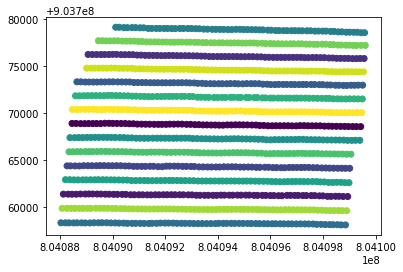

In [29]:
plt.scatter(imcenty,imcentx,c=kmeans.labels_)
plt.show()

In [30]:
new_polygen=[]
clsamp=[]
no_range=15
d=[]
for l in range(no_range):
    d.append(l)
for j in range(0,no_range):
    k=0
    cluster=[]
    imcx=[]
    imcy=[]
    for i in range(len(imcentx)):
        if id_label[i]==j:
            cluster.append(polygens[i])
            imcx.append(imcentx[i])
            imcy.append(imcenty[i])
            k+=1
    imcx,imcy,cluster=(list(t) for t in zip(*sorted(zip(imcx,imcy,cluster),key=lambda x: x[1],reverse=True)))
    clsamp.append([imcx[0],imcy[0]])
    c=0
    for cl in cluster:
        cl.row_id=c
        c+=1
    new_polygen.append(cluster)
new_polygen,clsamp,d=(list(t) for t in zip(*sorted(zip(new_polygen,clsamp,d), key=lambda x:(x[1][0],x[1][1]),reverse=True)))
original=[]
v=0
for k in new_polygen:
    for pol in k:
        pol.range_id=v
        original.append(pol)
#         print(v)
    v+=1

new_polygen=original
print(len(new_polygen))
d = dict(enumerate(d))
d = dict((v,k) for k,v in d.items())
print(d)
np.save('dict.npy', d)
read_dictionary = np.load('dict.npy').item()
print(read_dictionary[0])

1052
{6: 0, 11: 1, 2: 2, 13: 3, 4: 4, 9: 5, 14: 6, 0: 7, 7: 8, 10: 9, 3: 10, 8: 11, 1: 12, 12: 13, 5: 14}
7


In [31]:
clsamp

[[903778555, 804099581],
 [903777208, 804099608],
 [903775802, 804099563],
 [903774381, 804099539],
 [903772965, 804099507],
 [903771493, 804099496],
 [903770040, 804099472],
 [903768546, 804099435],
 [903767088, 804099400],
 [903765609, 804099062],
 [903764105, 804099015],
 [903762570, 804098989],
 [903761099, 804098940],
 [903759590, 804098903],
 [903758070, 804098855]]

In [38]:
def get_match(range_value,dictionary):
    read_dictionary=np.load(dictionary).item()
    return read_dictionary[range_value]
get_match(0,'dict.npy')

7

In [33]:
new_polygen[1].__dict__

{'ids': 1,
 'crop_count': 60,
 'canopy_cov': 'NIL',
 'stress_ind': 'NIL',
 'ndvi': 'NIL',
 'canopy_per': 'NIL',
 'centre': {'type': 'Point', 'coordinates': [-89.4515198267, 42.9806037036]},
 'types': 'automatic',
 'coords': {'Log1': '-89.4515139327',
  'Lat1': '42.9806320808',
  'Log2': '-89.4515211529',
  'Lat2': '42.9806323925',
  'Log3': '-89.4515257224',
  'Lat3': '42.9805753227',
  'Log4': '-89.4515185022',
  'Lat4': '42.9805750110'},
 'row_id': 1,
 'range_id': 0}

In [34]:
sorted_data=[polygon.__dict__ for polygon in new_polygen]

import json
with open('sorted_madisson.json', 'w') as outfile:
    json.dump(sorted_data, outfile)

In [35]:
import pickle
filename = 'kmeansort.pkl'
pickle.dump(kmeans, open(filename, 'wb'))

In [36]:
new_polygen[107].__dict__

{'ids': 55,
 'crop_count': 76,
 'canopy_cov': 'NIL',
 'stress_ind': 'NIL',
 'ndvi': 'NIL',
 'canopy_per': 'NIL',
 'centre': {'type': 'Point', 'coordinates': [-89.4511395626, 42.9805465308]},
 'types': 'automatic',
 'coords': {'Log1': '-89.4511347418',
  'Lat1': '42.9805779297',
  'Log2': '-89.4511419716',
  'Lat2': '42.9805780792',
  'Log3': '-89.4511443852',
  'Lat3': '42.9805151282',
  'Log4': '-89.4511371554',
  'Lat4': '42.9805149787'},
 'row_id': 43,
 'range_id': 1}

In [39]:
with open('kmeansort.pkl','rb') as file:
    m=pickle.load(file)
# value=[-89.45122815324714, 42.98009069250152]
# transformed=transform(inProj,outProj,value[0],value[1])
# value=world2Pixel(geoTrans, transformed[1], transformed[0])
value=[903767230,80409415]
print(value)
res=m.predict([[value[0]]])
print(get_match(res[0],'dict.npy'))

[903767230, 80409415]
8


In [61]:
903767230,80409415

(903767230, 80409415)

In [67]:
m.predict([[903777208]])

array([14], dtype=int32)